# Heart Disease Prediction - Classfication

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Heart Disease Data.csv")
data=df.copy()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print("Missing Data Analysis:")
df.isnull().sum()

Missing Data Analysis:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
print("Summary Statistics for Numerical Features:")
df.describe()

Summary Statistics for Numerical Features:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EXPLORATORY DATA ANALYSIS

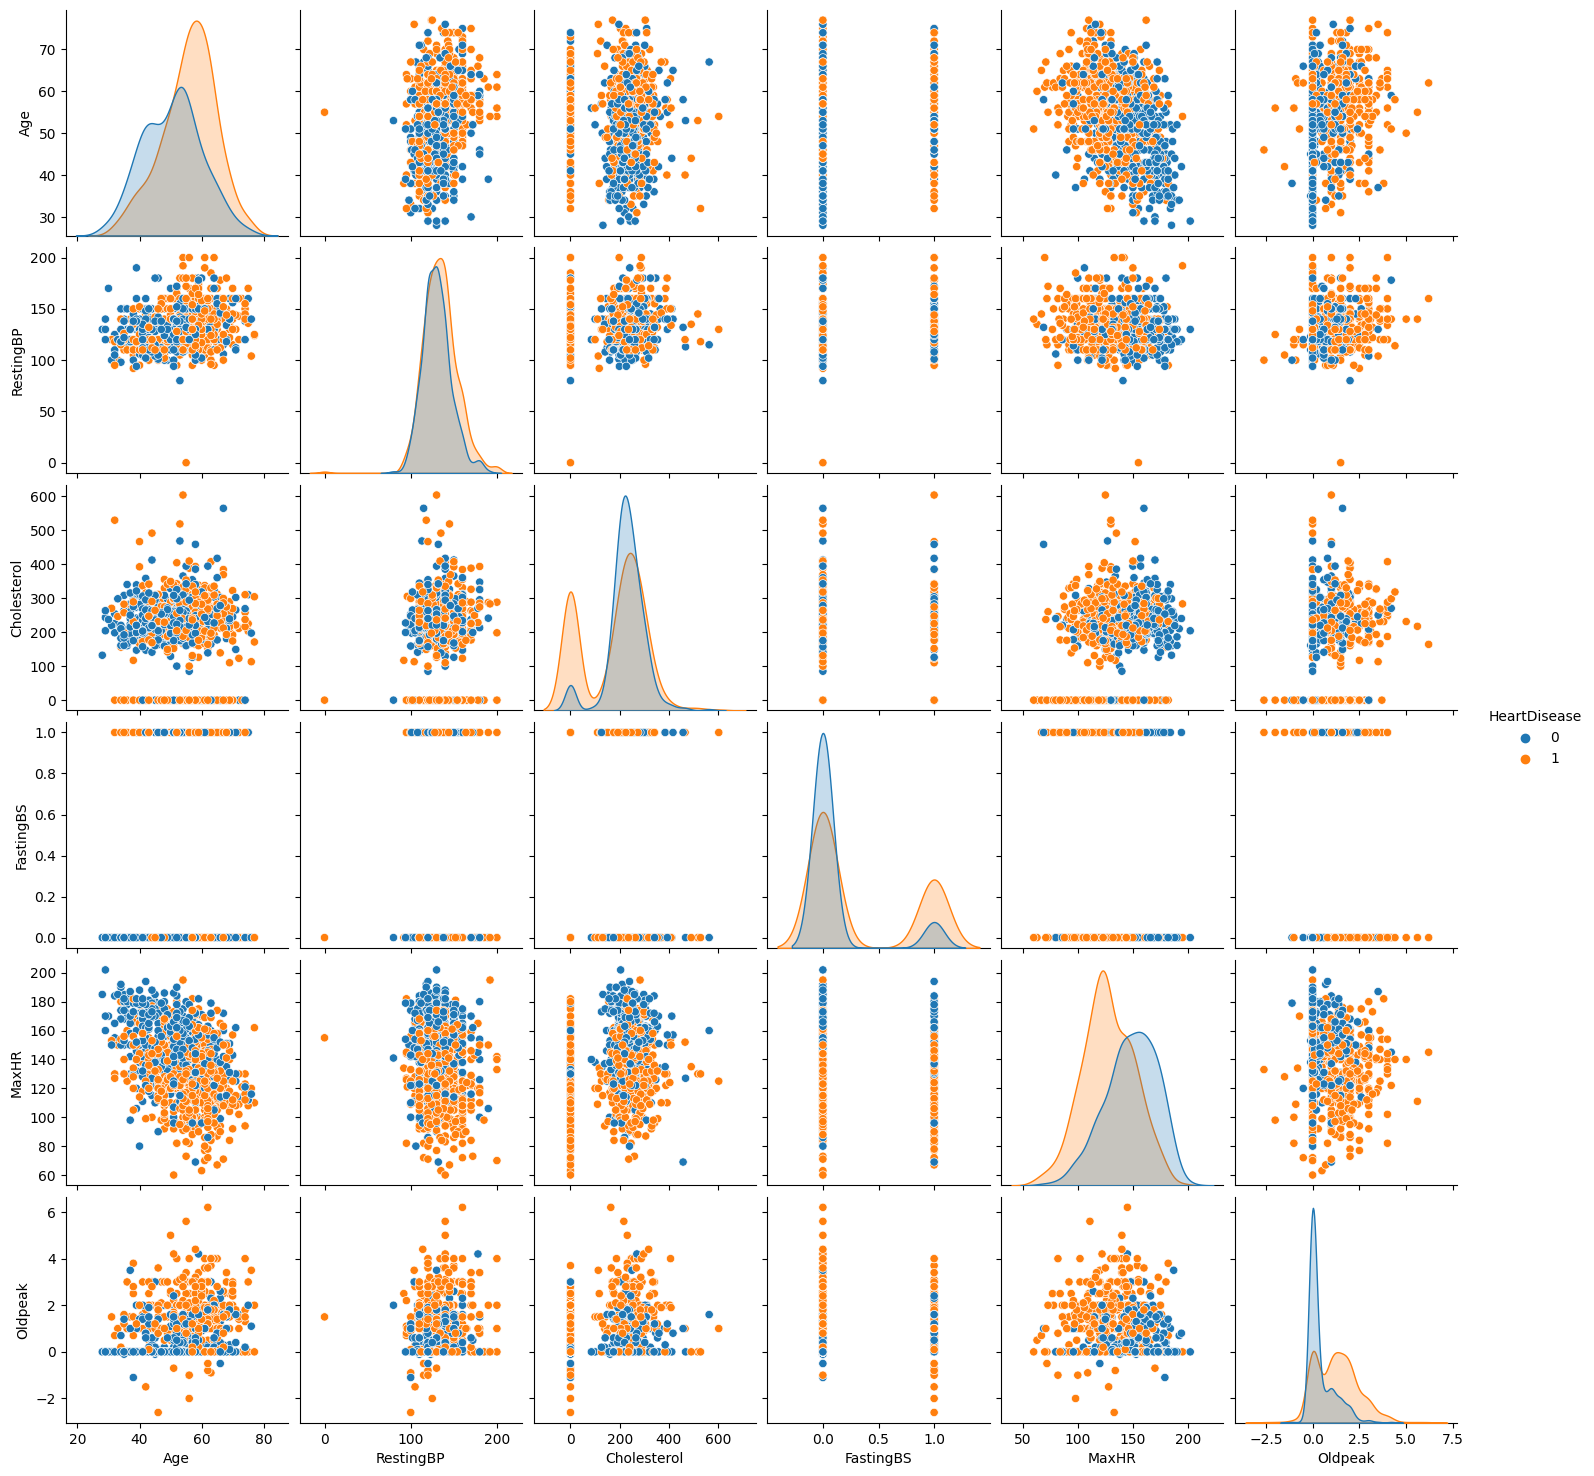

In [ ]:
sns.pairplot(df, hue="HeartDisease")

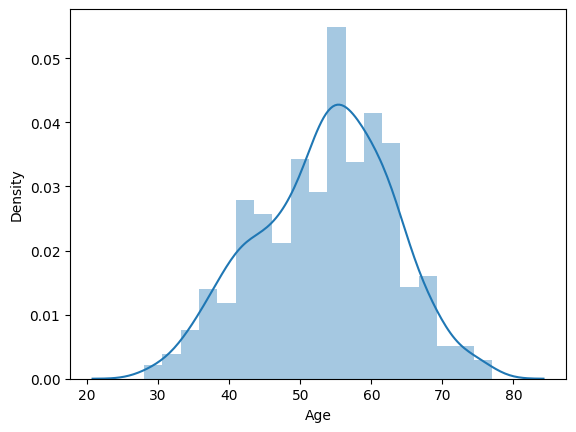

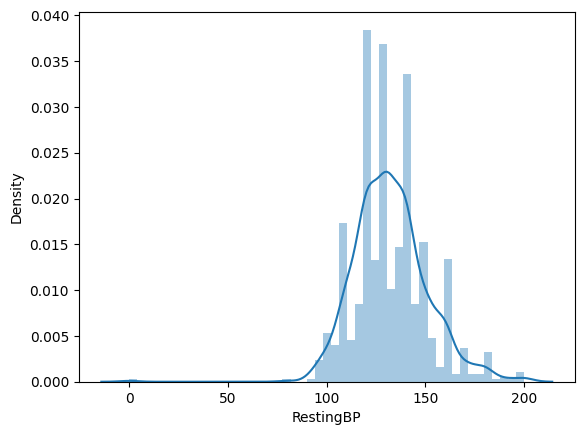

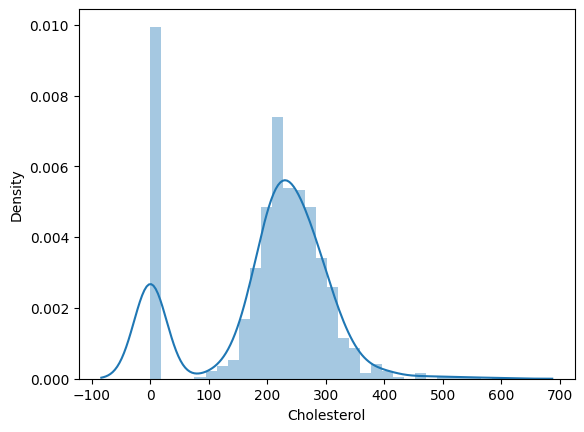

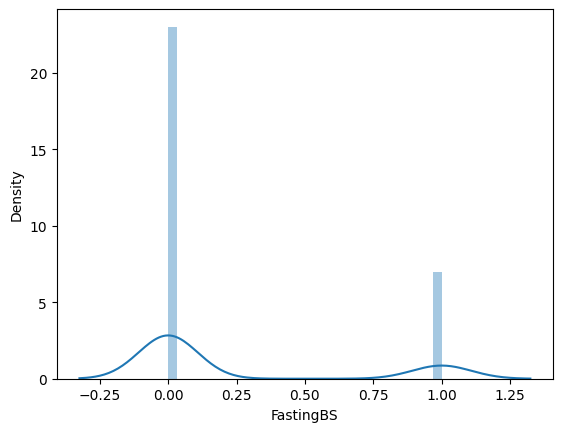

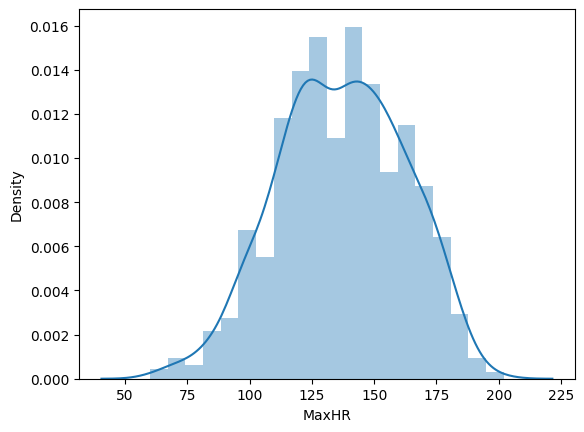

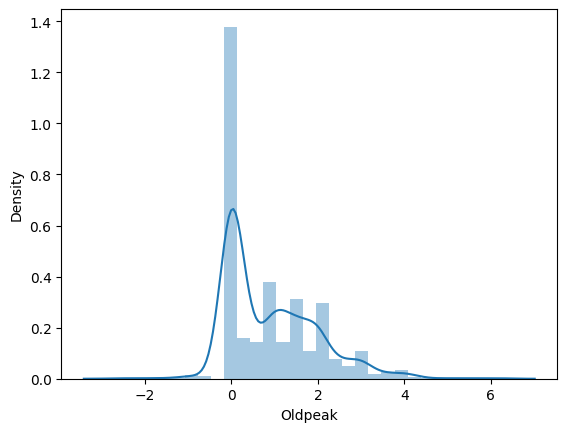

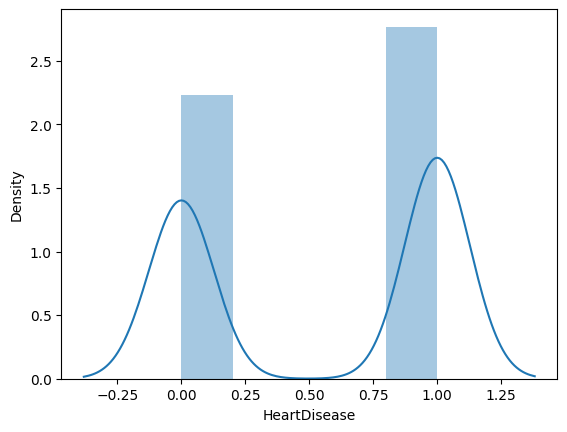

In [ ]:
for i in df.select_dtypes(include="number"):
    sns.distplot(df, x=df[i], kde=True)
    plt.xlabel(i)
    plt.show()

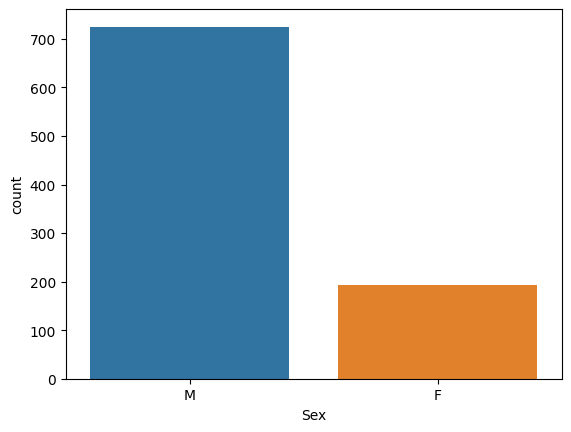

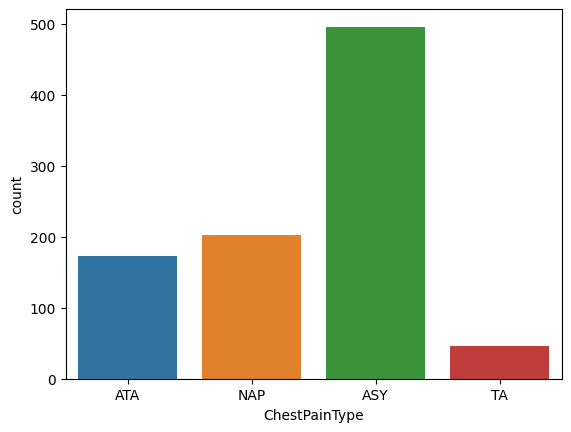

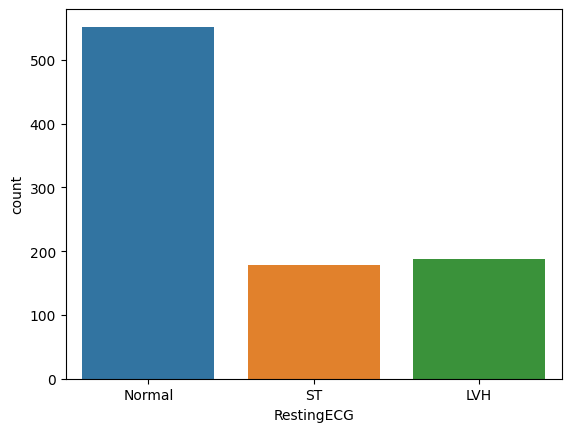

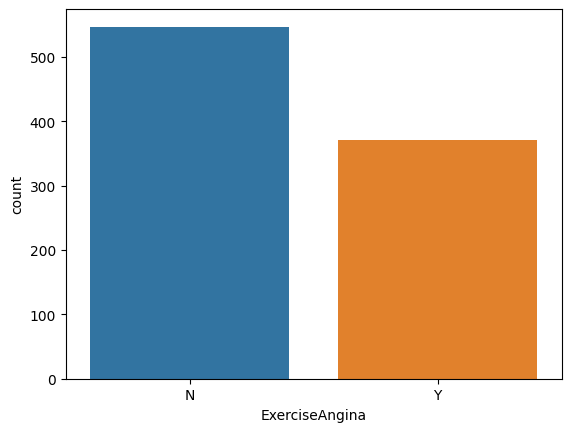

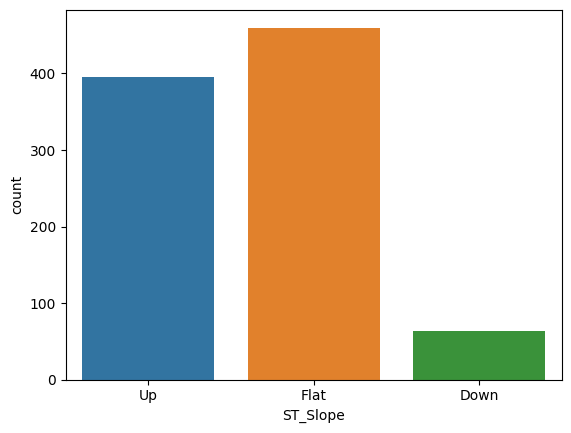

In [ ]:
for i in df.select_dtypes(include="object"):
    sns.countplot(df, x=df[i])
    plt.show()

1    508
0    410
Name: HeartDisease, dtype: int64


<Axes: xlabel='HeartDisease', ylabel='count'>

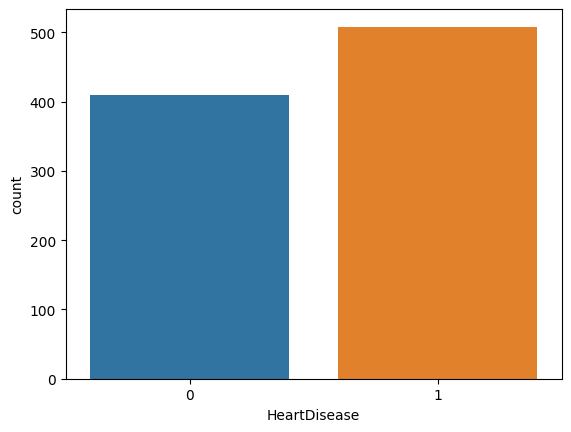

In [ ]:
print(df["HeartDisease"].value_counts())
sns.countplot(df, x=df["HeartDisease"])

In [ ]:
print("Before removing duplicate rows:", df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("After removing duplicate rows:", df.shape)

Before removing duplicate rows: (918, 12)
After removing duplicate rows: (918, 12)


# Base model selection & training

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [ ]:
x=df.drop("HeartDisease", axis=1)
y=df["HeartDisease"]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=9, stratify=y)

In [ ]:
train_x.shape

(688, 11)

In [ ]:
test_x.shape

(230, 11)

In [ ]:
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [ ]:
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [ ]:
one = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one.fit(train_cat)
train_cat = pd.DataFrame(one.transform(train_cat), columns=one.get_feature_names_out())
test_cat = pd.DataFrame(one.transform(test_cat), columns=one.get_feature_names_out())

In [ ]:
train_cat

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
684,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
685,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
686,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [ ]:
train_x1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,38,110,190,0,150,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56,170,388,0,122,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,46,150,231,0,147,3.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,60,130,186,1,140,0.5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,110,208,0,142,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,58,150,219,0,118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
684,46,100,0,1,133,-2.6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
685,45,140,224,0,144,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
686,69,142,210,1,112,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
sta = StandardScaler()
sta.fit(train_x1)
train_x1 = pd.DataFrame(sta.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(sta.transform(test_x1), columns=test_x1.columns)

In [ ]:
train_x1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.604532,-1.195796,-0.065500,-0.552723,0.471600,0.117345,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,-1.207122,1.207122,-0.270782,0.994203,-0.866393
1,0.275900,1.989290,1.755088,-0.552723,-0.640792,1.063809,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393
2,-0.768784,0.927594,0.311490,-0.552723,0.352415,2.578150,-0.505445,0.505445,-1.041561,-0.500908,1.854376,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,0.994203,-0.866393
3,0.693774,-0.134101,-0.102280,1.809224,0.074317,-0.355887,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,1.952227,-1.225487,-0.487247,-1.207122,1.207122,-0.270782,0.994203,-0.866393
4,0.066963,-1.195796,0.100008,-0.552723,0.153774,-0.829119,-0.505445,0.505445,-1.041561,1.996374,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,-1.005831,1.154211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.484837,0.927594,0.201152,-0.552723,-0.799705,-0.829119,-0.505445,0.505445,-1.041561,-0.500908,1.854376,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393
684,-0.768784,-1.726643,-1.812529,1.809224,-0.203781,-3.289924,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,0.828417,-0.828417,-0.270782,0.994203,-0.866393
685,-0.873253,0.396747,0.247126,-0.552723,0.233231,-0.829119,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,0.816002,-0.487247,0.828417,-0.828417,-0.270782,-1.005831,1.154211
686,1.633989,0.502916,0.118398,1.809224,-1.038075,0.590577,-0.505445,0.505445,0.960098,-0.500908,-0.539265,-0.238402,-0.512236,-1.225487,2.052345,-1.207122,1.207122,-0.270782,0.994203,-0.866393


In [ ]:
logr = LogisticRegression()
logr.fit(train_x1, train_y)
pred = logr.predict(test_x1)

print("Train score:", logr.score(train_x1, train_y))
print("Test score:", logr.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))
print("")
print(classification_report(pred, test_y))

Train score: 0.872093023255814
Test score: 0.8739130434782608

Accuracy: 0.8739130434782608
Precision: 0.937007874015748
Recall: 0.85
F1 score: 0.8913857677902622

Confusion matrix:
[[ 82   8]
 [ 21 119]]

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.94      0.85      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.88       230



In [ ]:
decc = DecisionTreeClassifier()
decc.fit(train_x1, train_y)
pred = decc.predict(test_x1)

print("Train score:",decc.score(train_x1, train_y))
print("Test score:", decc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 1.0
Test score: 0.8478260869565217

Accuracy: 0.8478260869565217
Precision: 0.8976377952755905
Recall: 0.8382352941176471
F1 score: 0.8669201520912548

Confusion matrix:
[[ 81  13]
 [ 22 114]]


In [ ]:
rafc = RandomForestClassifier()
rafc.fit(train_x1, train_y)
pred = rafc.predict(test_x1)

print("Train score:",rafc.score(train_x1, train_y))
print("Test score:", rafc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 1.0
Test score: 0.8913043478260869

Accuracy: 0.8913043478260869
Precision: 0.9448818897637795
Recall: 0.8695652173913043
F1 score: 0.9056603773584906

Confusion matrix:
[[ 85   7]
 [ 18 120]]


In [ ]:
knnc = KNeighborsClassifier()
knnc.fit(train_x1, train_y)
pred = knnc.predict(test_x1)

print("Train score:",knnc.score(train_x1, train_y))
print("Test score:", knnc.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred, test_y))
print("Precision:", precision_score(pred, test_y))
print("Recall:", recall_score(pred, test_y))
print("F1 score:", f1_score(pred, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred, test_y))

Train score: 0.8851744186046512
Test score: 0.8826086956521739

Accuracy: 0.8826086956521739
Precision: 0.9212598425196851
Recall: 0.8731343283582089
F1 score: 0.896551724137931

Confusion matrix:
[[ 86  10]
 [ 17 117]]


In [ ]:
log_model1 = LogisticRegression(C=4, solver="sag", tol=0.9)
log_model1.fit(train_x1, train_y)
pred_log1 = log_model1.predict(test_x1)

print("Train score:",log_model1.score(train_x1, train_y))
print("Test score:", log_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_log1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_log1, test_y))

Train score: 0.8633720930232558
Test score: 0.8739130434782608

Recall: 0.8602941176470589

Confusion matrix:
[[ 84  10]
 [ 19 117]]


In [ ]:
dec_model1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, splitter= 'best')
dec_model1.fit(train_x1, train_y)
pred_dec1 = dec_model1.predict(test_x1)

print("")
print("Train score:",dec_model1.score(train_x1, train_y))
print("Test score:", dec_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_dec1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_dec1, test_y))


Train score: 0.872093023255814
Test score: 0.8695652173913043

Recall: 0.8344827586206897

Confusion matrix:
[[ 79   6]
 [ 24 121]]


In [ ]:
raf_model1 = RandomForestClassifier(max_depth=40, n_estimators=70)
raf_model1.fit(train_x1, train_y)
pred_raf1 = raf_model1.predict(test_x1)

print("")
print("Train score:",raf_model1.score(train_x1, train_y))
print("Test score:", raf_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_raf1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_raf1, test_y))


Train score: 1.0
Test score: 0.8869565217391304

Recall: 0.8686131386861314

Confusion matrix:
[[ 85   8]
 [ 18 119]]


In [ ]:
knn_model1 = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights="distance")
knn_model1.fit(train_x1, train_y)
pred_knn1 = knn_model1.predict(test_x1)

print("")
print("Train score:",knn_model1.score(train_x1, train_y))
print("Test score:", knn_model1.score(test_x1, test_y))
print("")
print("Recall:", recall_score(pred_knn1, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_knn1, test_y))


Train score: 1.0
Test score: 0.8826086956521739

Recall: 0.8731343283582089

Confusion matrix:
[[ 86  10]
 [ 17 117]]


# Feature selection

In [ ]:
x=data.drop("HeartDisease", axis=1)
y=data["HeartDisease"]

lae = LeaveOneOutEncoder(handle_unknown="ignore")
lae.fit(x,y)
x = pd.DataFrame(lae.transform(x), columns=lae.get_feature_names_out())

xy = pd.concat([x,y], axis=1)
xy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.631724,0.138728,140,289,0,0.516304,172,0.351005,0.0,0.197468,0
1,49,0.259067,0.354680,160,180,0,0.516304,156,0.351005,1.0,0.828261,1
2,37,0.631724,0.138728,130,283,0,0.657303,98,0.351005,0.0,0.197468,0
3,48,0.259067,0.790323,138,214,0,0.516304,108,0.851752,1.5,0.828261,1
4,54,0.631724,0.354680,150,195,0,0.516304,122,0.351005,0.0,0.197468,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0.631724,0.434783,110,264,0,0.516304,132,0.351005,1.2,0.828261,1
914,68,0.631724,0.790323,144,193,1,0.516304,141,0.351005,3.4,0.828261,1
915,57,0.631724,0.790323,130,131,0,0.516304,115,0.851752,1.2,0.828261,1
916,57,0.259067,0.138728,130,236,0,0.563830,174,0.351005,0.0,0.828261,1


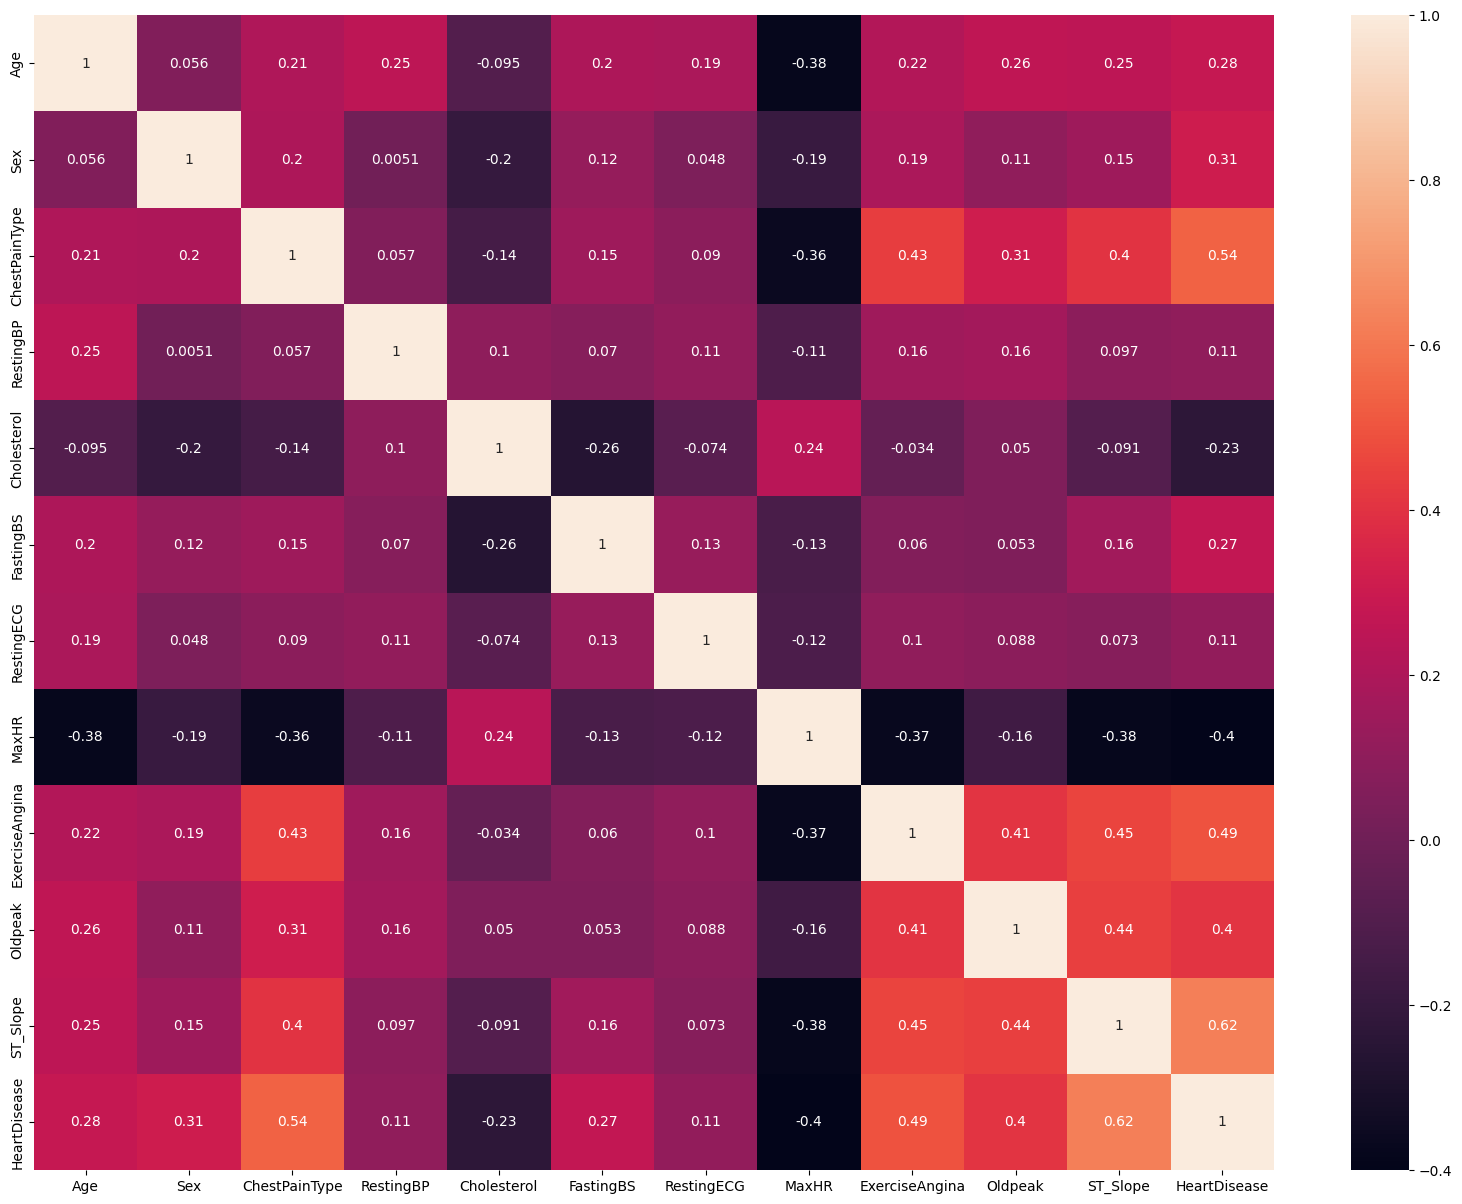

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(xy.corr(), annot=True)
plt.show()

<Axes: >

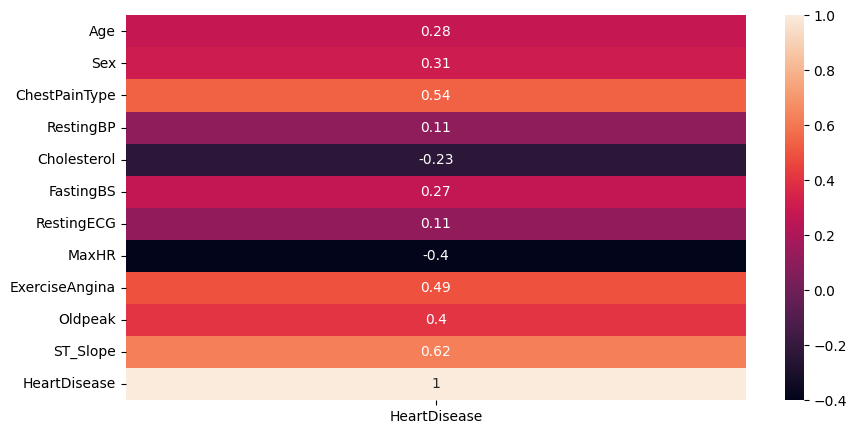

In [ ]:
z="HeartDisease"
cor = xy.corr()

plt.figure(figsize=(10,5))
sns.heatmap(cor[[z]], annot=True)

In [ ]:
x=df.drop(["HeartDisease","RestingECG","RestingBP"], axis=1)
y=df["HeartDisease"]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=11, stratify=y)

In [ ]:
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [ ]:
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [ ]:
lae = LeaveOneOutEncoder(handle_unknown="ignore")
lae.fit(train_cat, train_y)
train_cat = pd.DataFrame(lae.transform(train_cat), columns=lae.get_feature_names_out())
test_cat = pd.DataFrame(lae.transform(test_cat), columns=lae.get_feature_names_out())

In [ ]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [ ]:
sta = StandardScaler()
sta.fit(train_x1)
train_x1 = pd.DataFrame(sta.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(sta.transform(test_x1), columns=test_x1.columns)

In [ ]:
knn_mod = KNeighborsClassifier()
knn_mod.fit(train_x1, train_y)
pred_knn_mod = knn_mod.predict(test_x1)

print("Train score:", knn_mod.score(train_x1, train_y))
print("Test score:", knn_mod.score(test_x1, test_y))
print("")
print("Accuracy:", accuracy_score(pred_knn_mod, test_y))
print("Precision:", precision_score(pred_knn_mod, test_y))
print("Recall:", recall_score(pred_knn_mod, test_y))
print("F1 score:", f1_score(pred_knn_mod, test_y))
print("")
print("Confusion matrix:")
print(confusion_matrix(pred_knn_mod, test_y))
print("")
print(classification_report(pred_knn_mod, test_y))

Train score: 0.8793604651162791
Test score: 0.8869565217391304

Accuracy: 0.8869565217391304
Precision: 0.8346456692913385
Recall: 0.954954954954955
F1 score: 0.8907563025210083

Confusion matrix:
[[ 98  21]
 [  5 106]]

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       119
           1       0.83      0.95      0.89       111

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.89      0.89       230



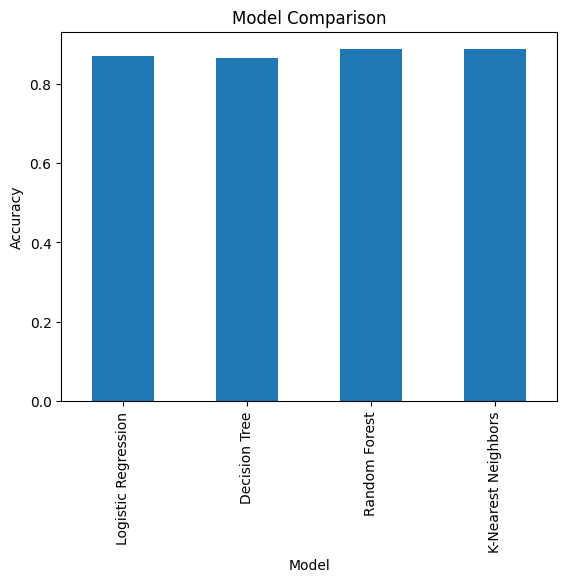

In [ ]:
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9, stratify=y)

# Initialize a dictionary to store model scores
model_scores = {}

# Logistic Regression
logr = LogisticRegression()
logr.fit(train_x1, train_y)
pred_logr = logr.predict(test_x1)
model_scores["Logistic Regression"] = accuracy_score(pred_logr, test_y)

# Decision Tree
decc = DecisionTreeClassifier()
decc.fit(train_x1, train_y)
pred_decc = decc.predict(test_x1)
model_scores["Decision Tree"] = accuracy_score(pred_decc, test_y)

# Random Forest
rafc = RandomForestClassifier()
rafc.fit(train_x1, train_y)
pred_rafc = rafc.predict(test_x1)
model_scores["Random Forest"] = accuracy_score(pred_rafc, test_y)

# K-Nearest Neighbors
knnc = KNeighborsClassifier()
knnc.fit(train_x1, train_y)
pred_knnc = knnc.predict(test_x1)
model_scores["K-Nearest Neighbors"] = accuracy_score(pred_knnc, test_y)

# Create a DataFrame from the model scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# Transpose the DataFrame and plot the bar chart
model_compare.T.plot(kind='bar', legend=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [ ]:
from tabulate import tabulate

x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9, stratify=y)

# Initialize a list to store model results
results = []

# Logistic Regression
logr = LogisticRegression()
logr.fit(train_x1, train_y)
pred_logr = logr.predict(test_x1)
accuracy_logr = accuracy_score(pred_logr, test_y)
results.append(["Logistic Regression", accuracy_logr])

# Decision Tree
decc = DecisionTreeClassifier()
decc.fit(train_x1, train_y)
pred_decc = decc.predict(test_x1)
accuracy_decc = accuracy_score(pred_decc, test_y)
results.append(["Decision Tree", accuracy_decc])

# Random Forest
rafc = RandomForestClassifier()
rafc.fit(train_x1, train_y)
pred_rafc = rafc.predict(test_x1)
accuracy_rafc = accuracy_score(pred_rafc, test_y)
results.append(["Random Forest", accuracy_rafc])

# K-Nearest Neighbors
knnc = KNeighborsClassifier()
knnc.fit(train_x1, train_y)
pred_knnc = knnc.predict(test_x1)
accuracy_knnc = accuracy_score(pred_knnc, test_y)
results.append(["K-Nearest Neighbors", accuracy_knnc])

# Print the results using tabulate
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="grid"))

+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Logistic Regression |   0.869565 |
+---------------------+------------+
| Decision Tree       |   0.869565 |
+---------------------+------------+
| Random Forest       |   0.891304 |
+---------------------+------------+
| K-Nearest Neighbors |   0.886957 |
+---------------------+------------+


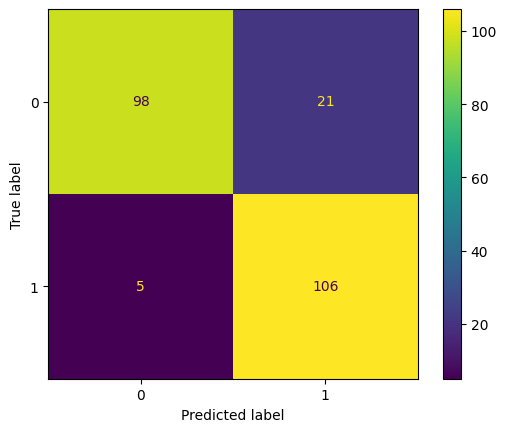

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(pred_knn_mod, test_y))